In [43]:
import numpy as np
import sys
import os
sys.path.append(os.getcwd().removesuffix('\\evaluation'))
print(sys.path)
from data_prepare.utils_plot import plot_3d_fast

PATH = "D:/ToothFairy3/imagesTr/ToothFairy3F_009_0000.nii.gz"
PATH_WEIGHTS = 'C:/Users/Jan/Desktop/teeth_segmentor/models/weights/weights_diffusion_2d_bigger_7.pt'

['c:\\Users\\Jan\\miniconda3\\python312.zip', 'c:\\Users\\Jan\\miniconda3\\DLLs', 'c:\\Users\\Jan\\miniconda3\\Lib', 'c:\\Users\\Jan\\miniconda3', '', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Jan\\miniconda3\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor', 'c:\\Users\\Jan\\Desktop\\teeth_segmentor']


In [44]:
from evaluation.evaluate_diffusion_2d import evaluate_diffusion_2d

original, denoised = evaluate_diffusion_2d(weights_file=PATH_WEIGHTS, file=PATH, model_input_shape=(60, 60), stride = (60, 60), noise_level=3, layer_num=120)

UNetWithInputPadding(
  (expand): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
  (contract): Conv2d(16, 1, kernel_size=(5, 5), stride=(1, 1))
  (activ): GELU(approximate='none')
  (unet): UNet2DModel(
    (conv_in): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (time_proj): Timesteps()
    (time_embedding): TimestepEmbedding(
      (linear_1): Linear(in_features=16, out_features=64, bias=True)
      (act): SiLU()
      (linear_2): Linear(in_features=64, out_features=64, bias=True)
    )
    (down_blocks): ModuleList(
      (0): DownBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(16, 16, eps=1e-05, affine=True)
            (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (time_emb_proj): Linear(in_features=64, out_features=16, bias=True)
            (norm2): GroupNorm(16, 16, eps=1e-05, affine=True)
            (dropout): Dropout(p=0.0, inplace=Fal

1it [00:00,  9.22it/s]c:\Users\Jan\Desktop\teeth_segmentor\evaluation\evaluate_diffusion_2d.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noise_level = tc.tensor(noise_level, dtype = tc.int64).cuda()
49it [00:03, 14.71it/s]


0.0
-0.050197429955005646


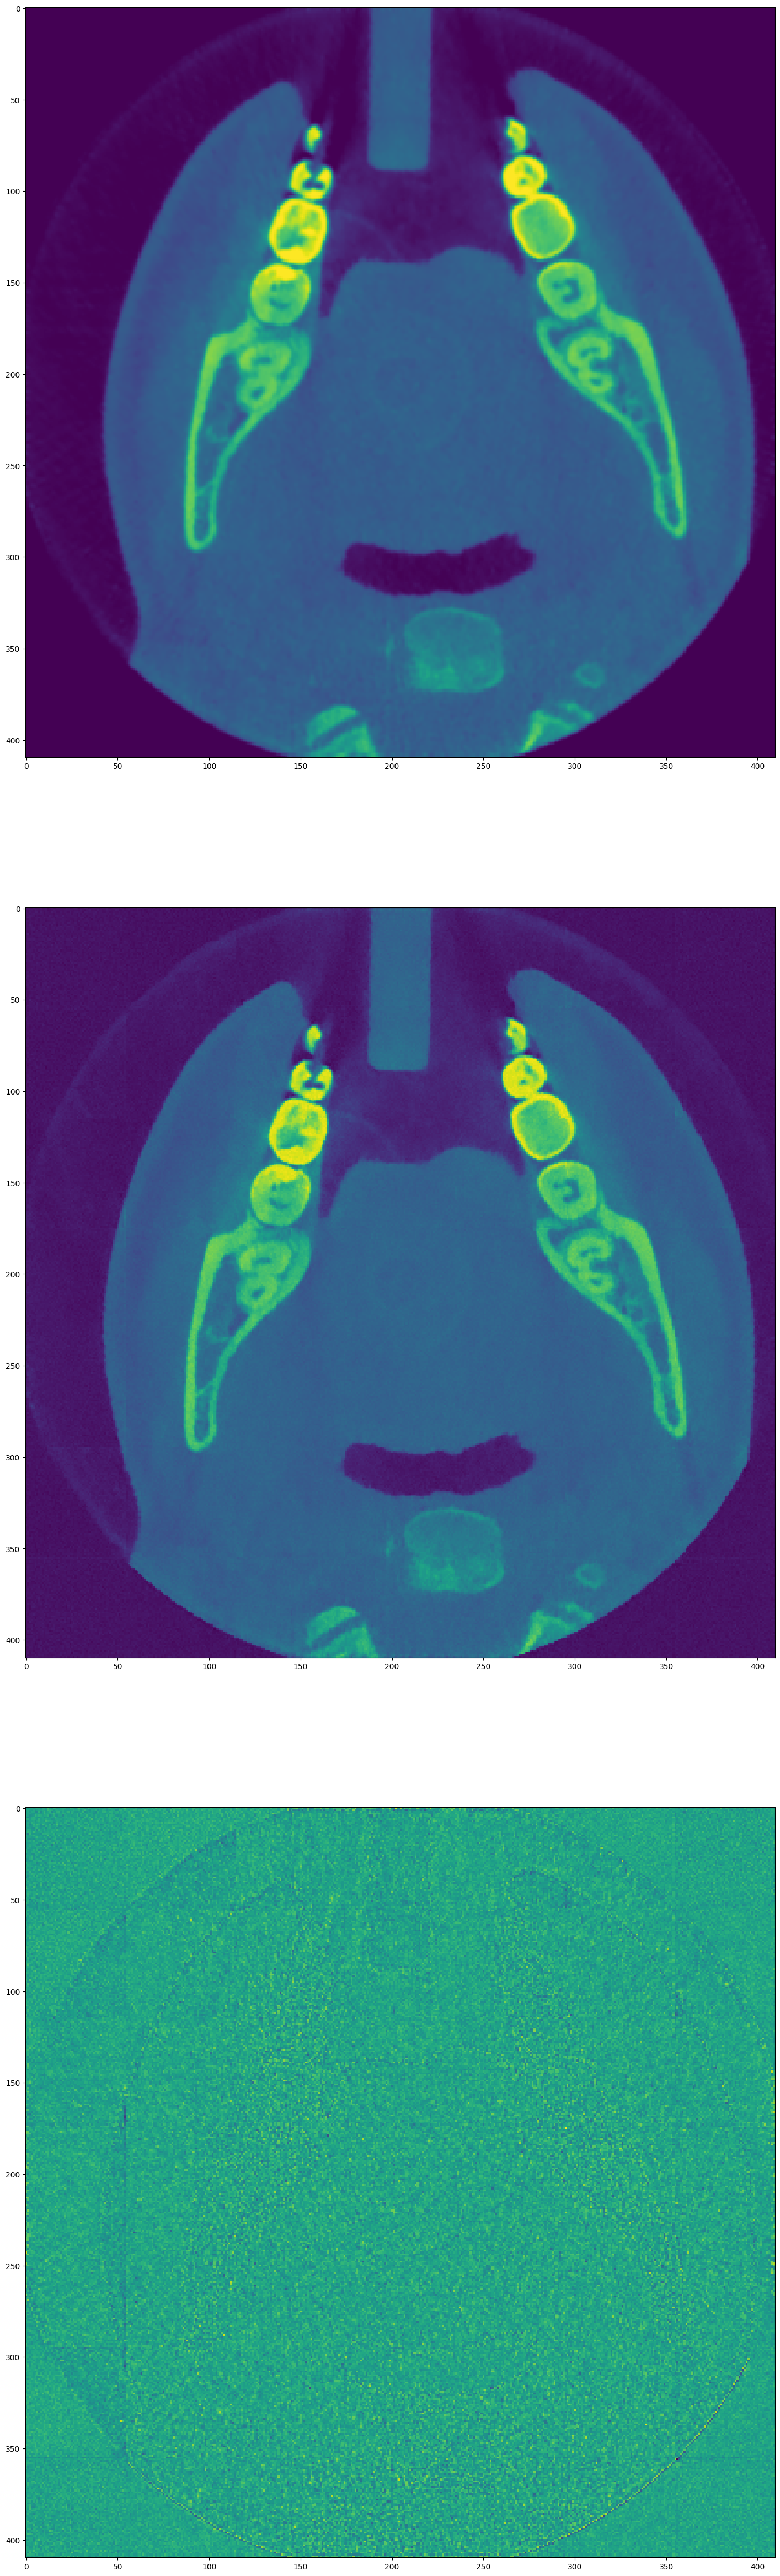

In [46]:
import matplotlib.pyplot as plt
from skimage.filters import gaussian

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (180, 60))

ax1.imshow(gaussian(original, sigma = 0.8))

def norm(image):
    return (image - image.min())/(image.max() - image.min())

#denoised = norm(denoised)

ax2.imshow(denoised)
ax3.imshow(original - denoised)

print(original.min())
print(denoised.min())